In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet


In [2]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stavan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Stavan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Stavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('bbc-text.csv')

In [4]:
df.shape

(2225, 2)

In [5]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [7]:
df.head(1)

,category,text
0,tech,tv future in the hands of viewers with home th...


In [12]:
df.loc[1,'text']

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [13]:
inputs = df['text']
labels = df['category']

<AxesSubplot:>

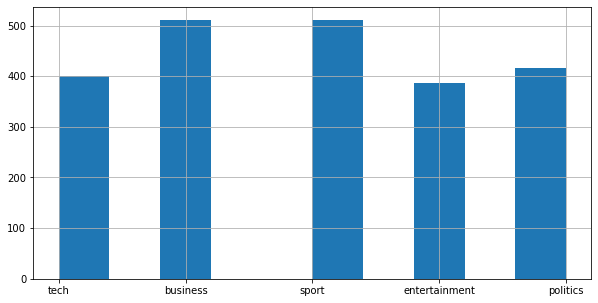

In [14]:
labels.hist(figsize=(10,5))#The point of this is to see whether or not we have imbalanced classes.That is if any class is over 
# or under represented. This can be an issue when we check our model's performance since, for example, if ninety nine percent
#of our data belongs to one class, we can obtain ninety nine percent accuracy by only predicting that. In that case,
#we would want to use other metrics in order to get a better sense of how our model is

In [15]:
#The next step is to do a train test, split note that we do this before using the Count Vectorizer.
inputs_train, inputs_test, Y_train, Y_test = train_test_split(inputs, labels, random_state= 123)

In [16]:
vectorizer = CountVectorizer() # we are not using any arguments here, simply initiating the CV.

In [17]:
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
# why we call fit transform in one case, but only transform in the other case.. Recall that the training data is supposed 
# to represent what we have when we build our model. The test data is supposed to represent what we have when we apply our
# model to data we haven't seen before. As such, we would not want to fit on the test data because that's not how test data 
# will be used.


In [18]:
X_train
# X train and X tests are matrices with number of rows equal to the number of data samples and number of columns equal 
# to the vocabulary size.

<1668x25997 sparse matrix of type '<class 'numpy.int64'>'
	with 336528 stored elements in Compressed Sparse Row format>

In [19]:
(X_train != 0).sum()

336528

In [20]:
# % of values that are non-zero 
(X_train != 0).sum() / np.prod(X_train.shape)#On the denominator, we have the product of extreme dot shape

0.007760718378407248

In [24]:
model = MultinomialNB()
model.fit(X_train, Y_train)
print('train score :', model.score(X_train, Y_train))
print('test score :', model.score(X_test, Y_test))

train score : 0.9928057553956835
test score : 0.9766606822262118


In [25]:
#with Stop words
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, Y_train)
print('train score :', model.score(X_train, Y_train))
print('test score :', model.score(X_test, Y_test))

train score : 0.9940047961630696
test score : 0.9730700179533214


In [26]:
# will map parts of speech tags in NLTK
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else :
        return wordnet.NOUN

In [27]:
#this is going to do all the work of tokenizing and limiting each document. 
# What do we want to do is create an object and then we want to be able to call that object as if it were afunction
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)  #like string.split
        words_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos= get_wordnet_pos(tag)) for word, tag in words_tags]
        

In [36]:
#with Lemmatization  -- very slow process - time consuming
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())#Note that this takes in any callable, so an object with a call function is acceptable.
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, Y_train)
print('train score :', model.score(X_train, Y_train))
print('test score :', model.score(X_test, Y_test))
X_train.shape

train score : 0.9946043165467626
test score : 0.9730700179533214


(1668, 25024)

In [30]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)  #like string.split
        return [self.porter.stem(t) for t in tokens]

In [35]:
# with Stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())#Note that this takes in any callable, so an object with a call function is acceptable.
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, Y_train)
print('train score :', model.score(X_train, Y_train))
print('test score :', model.score(X_test, Y_test))
X_train.shape

train score : 0.9922062350119905
test score : 0.9748653500897666


(1668, 21901)

In [32]:
def simple_tokenizer(s):
    return s.split()

In [34]:
# with split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)#Note that this takes in any callable, so an object with a call function is acceptable.
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, Y_train)
print('train score :', model.score(X_train, Y_train))
print('test score :', model.score(X_test, Y_test))
X_train.shape

train score : 0.9934052757793765
test score : 0.9694793536804309


(1668, 37787)

In [37]:
# now when we see the shape of X-train for each case, we can see how the dimensionality is reduced with stemming and lemmatization
# and also in this case stemming performed better